In [1]:
import torch
import torchvision
import matplotlib.pyplot as plt

# Read an image
image = torchvision.io.read_image("SJ3.jpg").float() / 255.
image.shape

# Convert image to frequency domain centered at image center
image_fft = torch.fft.fftshift(torch.fft.fft2(image))

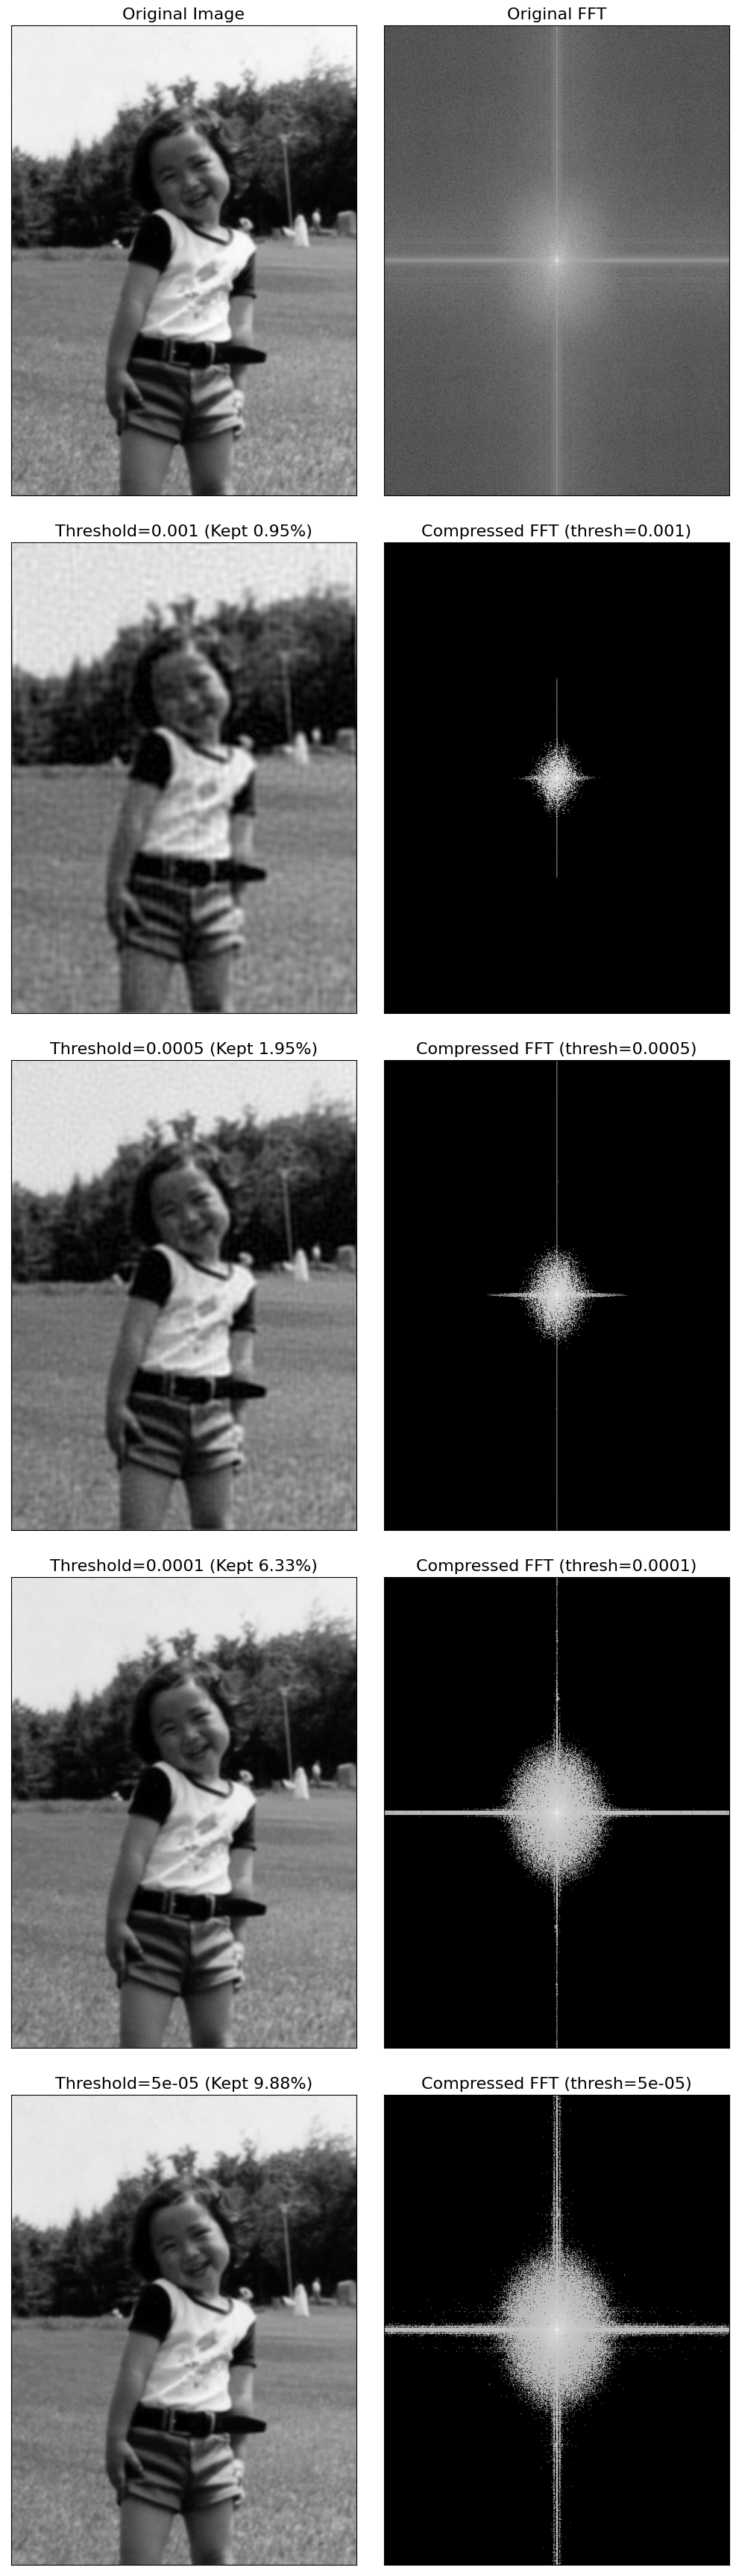

In [6]:
# Show how to compress the image in frequency domain by zeroing out high frequencies
def compress_image(image_fft, threshold=0.1):
    # Create a mask to zero out high frequencies
    magnitude = torch.abs(image_fft)
    mask = magnitude > threshold * magnitude.max()
    compressed_fft = image_fft * mask

    # Calculate compression ratio (percentage of coefficients retained)
    compression_ratio = mask.sum().item() / mask.numel() * 100
    return compressed_fft, compression_ratio

# Try different threshold levels
thresholds = [1e-3, 5e-4, 1e-4, 5e-5]

# Get image dimensions to calculate aspect ratio
C, H, W = image.shape
aspect_ratio = W / H
num_rows = len(thresholds) + 1
num_cols = 2

# Create a figure with proper size
fig_width = 10  # inches
fig_height = fig_width * (num_rows / num_cols) / aspect_ratio
fig = plt.figure(figsize=(fig_width, fig_height))

# Use gridspec for more control
from matplotlib import gridspec
gs = gridspec.GridSpec(num_rows, num_cols, width_ratios=[1, 1], wspace=0, hspace=0.1)

# First, show the original image
ax = fig.add_subplot(gs[0, 0])
ax.imshow(image.squeeze(), cmap='gray')
ax.set_title('Original Image', fontsize=16)
ax.set_xticks([])
ax.set_yticks([])

ax = fig.add_subplot(gs[0, 1])
ax.imshow(torch.log(torch.abs(image_fft) + 1e-8).squeeze(), cmap='gray')
ax.set_title('Original FFT', fontsize=16)
ax.set_xticks([])
ax.set_yticks([])

# Then show different compression levels
for i, threshold in enumerate(thresholds):
    compressed_fft, ratio = compress_image(image_fft, threshold=threshold)
    image_compressed = torch.fft.ifft2(torch.fft.ifftshift(compressed_fft))
    
    ax = fig.add_subplot(gs[i+1, 0])
    ax.imshow(torch.abs(image_compressed).squeeze(), cmap='gray')
    ax.set_title(f'Threshold={threshold} (Kept {ratio:.2f}%)', fontsize=16)
    ax.set_xticks([])
    ax.set_yticks([])
    
    ax = fig.add_subplot(gs[i+1, 1])
    ax.imshow(torch.log(torch.abs(compressed_fft) + 1e-8).squeeze(), cmap='gray')
    ax.set_title(f'Compressed FFT (thresh={threshold})', fontsize=16)
    ax.set_xticks([])
    ax.set_yticks([])

# Adjust figure to fill window
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, wspace=0, hspace=0.1)

plt.show()